# A Whale Off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `wh_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
# Custom method to change datatype of a column to datetime
def fix_date(df,date_column):
    df_copy = df.copy()
    df_copy[date_column] = df_copy[date_column].astype('datetime64')
    return df_copy

In [3]:
def remove_symbol(df,column_number): # removes '$' from currency
        pd.set_option('mode.chained_assignment',None)
        for i in range(len(df)):
            df.iloc[:,column_number][i] = df.iloc[:,column_number][i].replace('$','')
            # print(df.iloc[i:, 1][i])
            i += 1
        return df

In [4]:
def fix_currency_dtype(df,column_name):
        new_df = df.copy()
        new_df[column_name] = df[column_name].astype('float64')

        return new_df

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_csv = Path("Resources/whale_returns.csv")
whale = pd.read_csv(whale_csv)

In [6]:
whale # view DataFrame head, tail, total rows and columns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [7]:
whale = whale.dropna() # Drop nulls

In [8]:
whale.isna().sum() # Count nulls

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
whale.dtypes # check datatypes
# check_dtype("whale",whale)

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [10]:
whale = fix_date(whale,'Date')

In [11]:
whale.dtypes

Date                           datetime64[ns]
SOROS FUND MANAGEMENT LLC             float64
PAULSON & CO.INC.                     float64
TIGER GLOBAL MANAGEMENT LLC           float64
BERKSHIRE HATHAWAY INC                float64
dtype: object

In [12]:
# set index to 'Date'
whale.set_index('Date',inplace=True)

In [13]:
whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [14]:
# Reading algorithmic returns
algo_csv = Path("Resources/algo_returns.csv")
algo = pd.read_csv(algo_csv)
algo # verify DataFrame head, tail, total rows and columns

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [15]:
# Count nulls
algo.isna().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [16]:
# Drop nulls
algo = algo.dropna()
algo.isna().sum() # verify nulls dropped

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [17]:
algo.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [18]:
algo = fix_date(algo,'Date')

In [19]:
algo.dtypes

Date      datetime64[ns]
Algo 1           float64
Algo 2           float64
dtype: object

In [20]:
algo.set_index('Date',inplace=True)

In [21]:
algo # view head, tail, and number of rows, columns of cleaned data

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [22]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
history = pd.read_csv(sp500_history_csv)
history

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [23]:
history.dtypes

Date     object
Close    object
dtype: object

In [24]:
history = fix_date(history,'Date')

In [25]:
history.dtypes

Date     datetime64[ns]
Close            object
dtype: object

In [26]:
history.set_index('Date',inplace=True)

In [27]:
history.sort_index(ascending=True,inplace=True)

In [28]:
history

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [29]:
column_number = 0
column_name = 'Close'

In [30]:
history = remove_symbol(history,column_number)

In [31]:
sp500 = fix_currency_dtype(history,column_name)

In [32]:
sp500.dtypes

Close    float64
dtype: object

In [33]:
sp500['Close'] = sp500['Close'].pct_change(fill_method='ffill') # Calculate Daily Returns for SP500

In [34]:
sp500

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [35]:
sp500.dropna(inplace=True) # Drop nulls

In [36]:
sp500.isna().sum()

Close    0
dtype: int64

In [37]:
# Rename `Close` Column to be specific to this portfolio.
sp500.rename(columns = {'Close':'S&P 500'}, inplace=True)

In [38]:
sp500

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [39]:
whale.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [40]:
algo.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [41]:
sp500.dtypes

S&P 500    float64
dtype: object

In [42]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
dfs = [whale, algo, sp500]
combined_returns = pd.concat(dfs, axis=1,join="inner")

In [43]:
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [44]:
combined_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

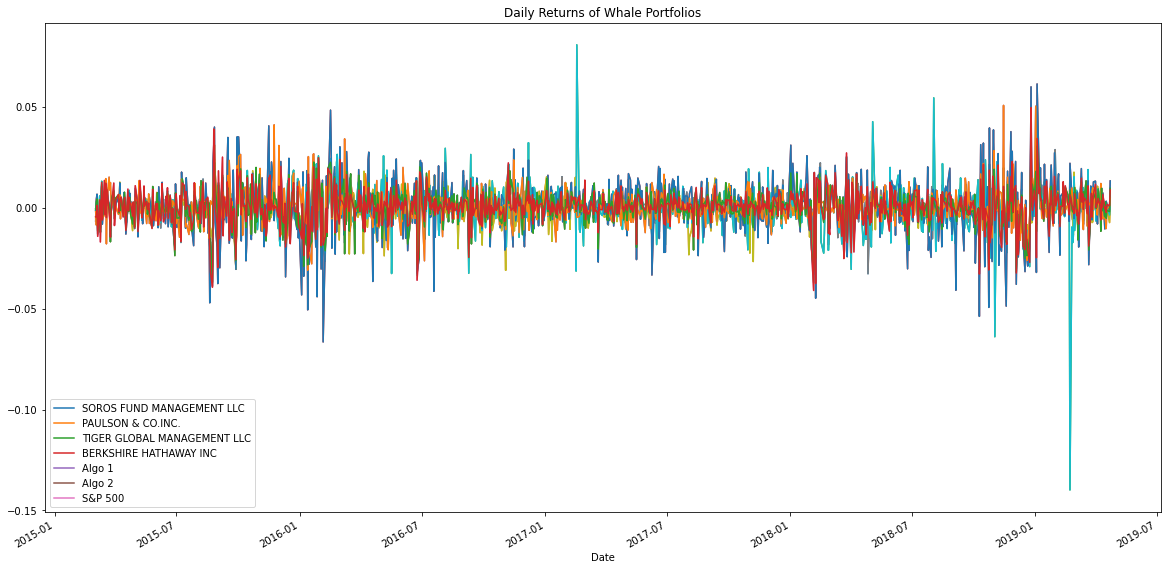

In [45]:
# Plot daily returns of all portfolios
names = list(combined_returns)
ax = combined_returns.plot(figsize=(20,10), title='Daily Returns of Whale Portfolios')
combined_returns.plot(ax=ax)

ax.legend(names)

#### Calculate and Plot cumulative returns.

In [46]:
# Calculate cumulative returns of all portfolios
cumulative_returns = combined_returns.cumsum()
cumulative_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000964,-0.001739,-0.003030,-0.002356,-0.010531,0.001467,-0.008927
2015-03-05,0.004980,0.002337,-0.000675,0.004371,-0.011486,0.005790,-0.007731
2015-03-06,-0.002925,-0.001237,-0.009156,-0.008727,-0.016443,-0.005670,-0.021905
2015-03-09,-0.002343,0.002988,-0.003313,-0.010380,-0.021890,-0.004367,-0.017961
...,...,...,...,...,...,...,...
2019-04-16,0.181758,-0.214043,-0.085654,0.510458,0.695489,0.273574,0.355171
2019-04-17,0.178861,-0.220510,-0.090063,0.513680,0.685188,0.268346,0.352897
2019-04-18,0.180309,-0.219289,-0.089482,0.515596,0.684600,0.267117,0.354476


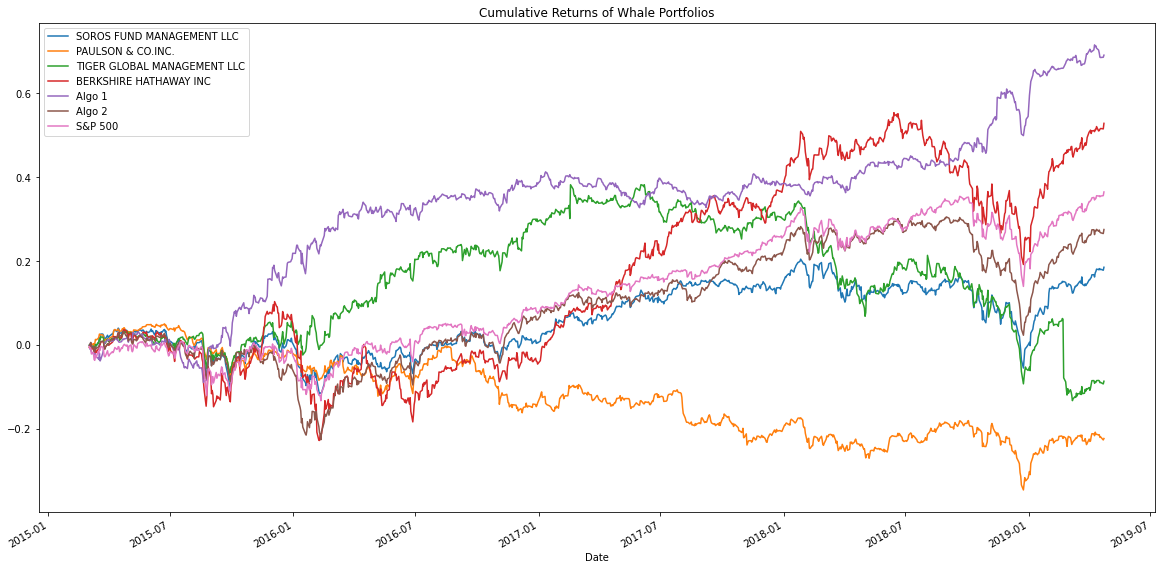

In [47]:
# Plot cumulative returns
names = list(combined_returns)
ax = cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns of Whale Portfolios')

ax.legend(names)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

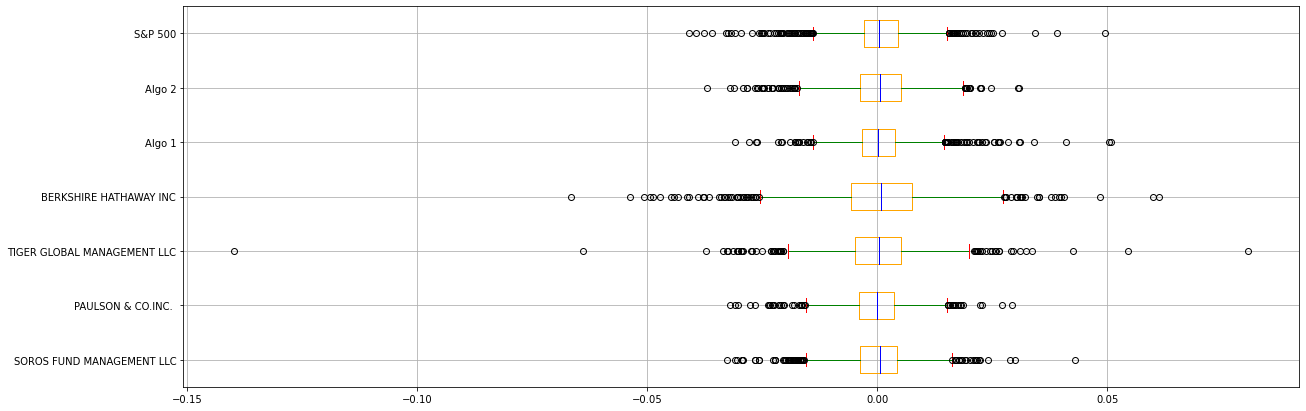

In [48]:
# Box plot to visually show risk
color = {
    "boxes": "Orange",
    "whiskers": "Green",
    "medians": "Blue",
    "caps": "Red"
}
combined_returns.boxplot(color=color,vert=False,figsize=(20,7))

### Calculate Standard Deviations

In [49]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [50]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_returns['S&P 500'].std()
sp500_std

0.008553731597758204

In [51]:
# Determine which portfolios are riskier than the S&P 500
sp500_std < daily_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

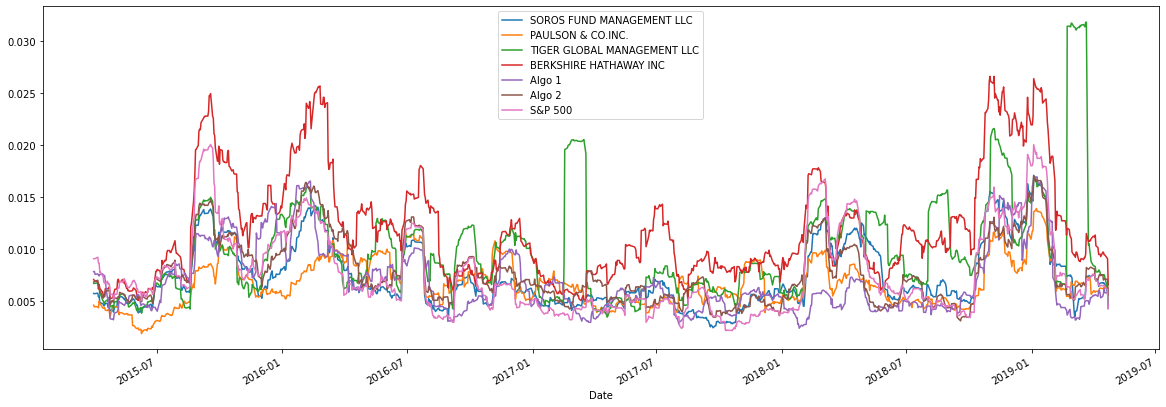

In [53]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std().plot(figsize=(20,7))

### Calculate and plot the correlation

In [54]:
# Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
returns_corr = combined_returns.corr() # Calculate the correlation

# Display de correlation matrix
returns_corr.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta for Berkshire Hathaway Inc.'}, xlabel='Date'>

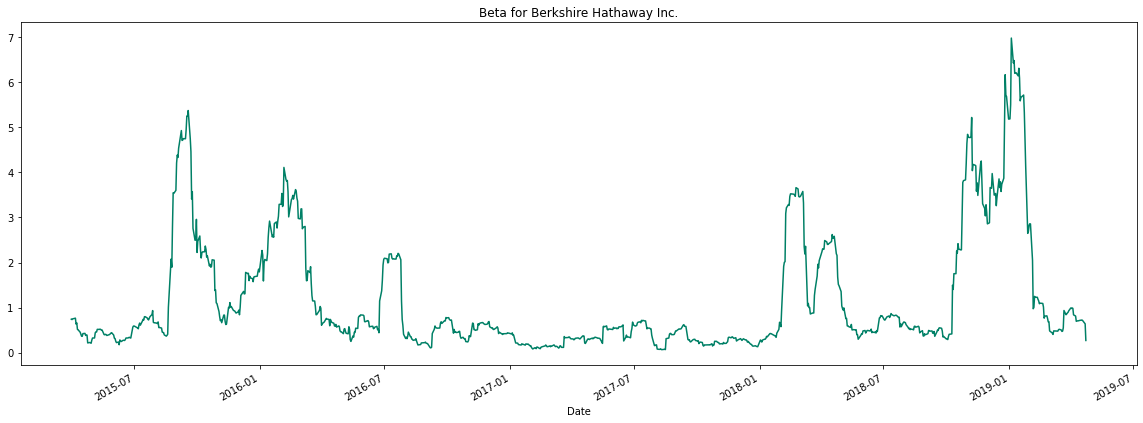

In [55]:
# Calculate covariance of a single portfolio
sp500_cov = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_returns['S&P 500'])

# Calculate variance of S&P 500
sp500_var = combined_returns['S&P 500'].var()

# Computing beta
beta = sp500_cov / sp500_var
# Plot beta trend
beta.plot(figsize=(20,7),cmap='summer',title='Beta for Berkshire Hathaway Inc.')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average'}, xlabel='Date'>

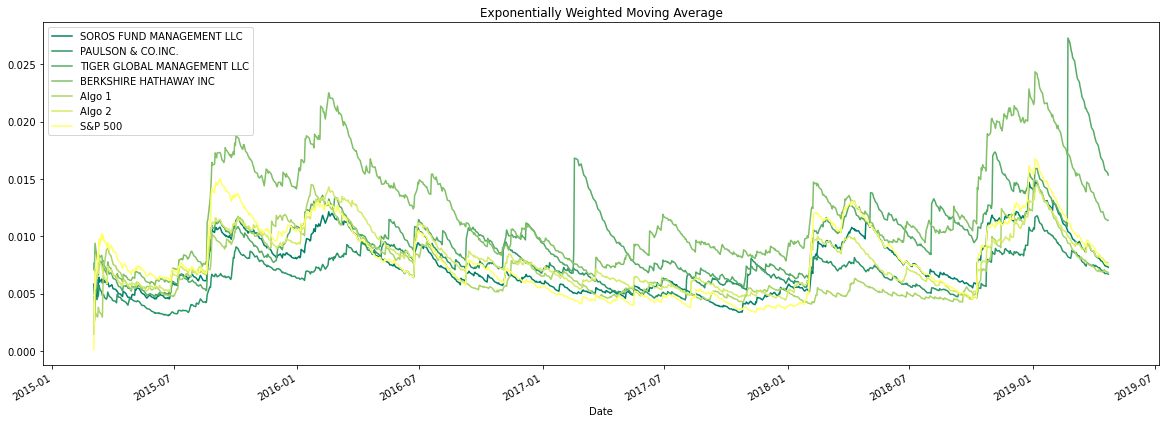

In [56]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).std().plot(figsize=(20,7),title='Exponentially Weighted Moving Average',cmap='summer')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [57]:
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

In [58]:
# Annualized Sharpe Ratios
annualized_sharpe_ratio = (combined_returns.mean() * 252) / annualized_std
annualized_sharpe_ratio

Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
S&P 500                        0.648267
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

<AxesSubplot:>

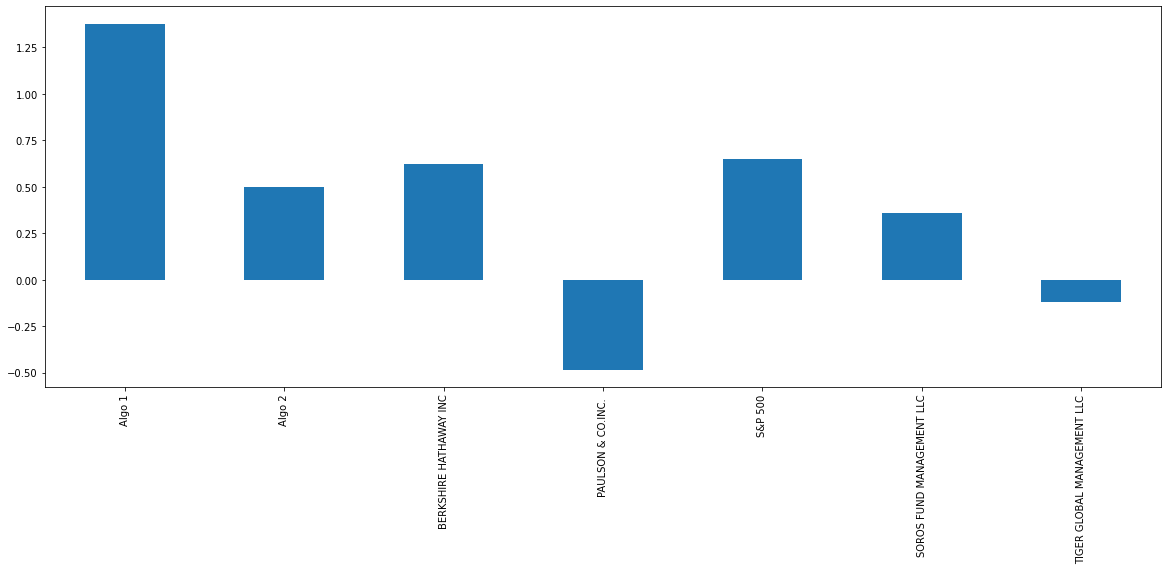

In [59]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind='bar',figsize=(20,7))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

- *Algo 1* outperformed all whale portolios and *S&P 500*

- *Algo 2* outperformed 3 out of 4 whale portfolios but did not outperform *Berkshire Hathaway Inc.* and the *S&P 500*

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [60]:
# Reading data from 1st stock
goog = pd.read_csv(Path("Resources","goog_historical.csv"),date_parser=True,infer_datetime_format=True)

goog = fix_date(goog,'Trade DATE')
goog.set_index('Trade DATE',inplace=True)
goog.sort_index(inplace=True)
goog

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [61]:
# Pulling Data From Yahoo Finiance without an API Key

# !yes | pip install yfinance
import yfinance as yf

ticker_list = ['SQ',
'GS',
'GDOT'
]

for x in range(len(ticker_list)):
    if x == 0:
        df = yf.Ticker(ticker_list[x]).history(start='2018-05-11',end='2019-05-09')['Close'].rename(ticker_list[x])    
    else:
        df1 = yf.Ticker(ticker_list[x]).history(start='2018-05-11',end='2019-05-09')['Close'].rename(ticker_list[x])
        df = pd.concat([df, df1], axis=1)
        
df = pd.concat([df,goog], axis=1)
df.drop(columns="Symbol",inplace=True)
df

,SQ,GS,GDOT,NOCP
2018-05-11,54.730000,224.610855,72.000000,1098.26
2018-05-14,54.279999,225.526230,72.730003,1100.20
2018-05-15,54.650002,223.353348,72.690002,1079.23
2018-05-16,56.590000,222.798615,72.050003,1081.77
2018-05-17,54.820000,221.078812,72.250000,1078.59
...,...,...,...,...
2019-05-03,68.519997,194.760895,66.680000,1185.40
2019-05-06,70.139999,193.737946,65.269997,1189.39
2019-05-07,68.419998,190.171570,63.060001,1174.10
2019-05-08,67.250000,188.594894,63.270000,1166.27


In [62]:
df.dropna(inplace=True)
df.isna().sum()

SQ      0
GS      0
GDOT    0
NOCP    0
dtype: int64

In [63]:
# Calculate daily returns
my_returns = df.pct_change().dropna()

In [64]:
# Display sample data pct returns
my_returns

,SQ,GS,GDOT,NOCP
2018-05-14,-0.008222,0.004075,0.010139,0.001766
2018-05-15,0.006817,-0.009635,-0.000550,-0.019060
2018-05-16,0.035499,-0.002484,-0.008805,0.002354
2018-05-17,-0.031278,-0.007719,0.002776,-0.002940
2018-05-18,0.004013,-0.008783,-0.011349,-0.011339
...,...,...,...,...
2019-05-02,-0.079870,0.001270,0.022327,-0.004683
2019-05-03,0.011515,0.012342,0.025531,0.019602
2019-05-06,0.023643,-0.005252,-0.021146,0.003366
2019-05-07,-0.024522,-0.018408,-0.033859,-0.012855


In [65]:
# pct_returns.shape
# weights.shape

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [66]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return

# Display sample data
my_returns.dot(weights)

2018-05-14    0.001940
2018-05-15   -0.005607
2018-05-16    0.006641
2018-05-17   -0.009790
2018-05-18   -0.006865
                ...   
2019-05-02   -0.015239
2019-05-03    0.017247
2019-05-06    0.000153
2019-05-07   -0.022411
2019-05-08   -0.007182
Length: 248, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [67]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([combined_returns,my_returns], axis=1)

In [68]:
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,SQ,GS,GDOT,NOCP
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079870,0.001270,0.022327,-0.004683
2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011515,0.012342,0.025531,0.019602
2019-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023643,-0.005252,-0.021146,0.003366
2019-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.024522,-0.018408,-0.033859,-0.012855


In [69]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace=True)

In [70]:
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,SQ,GS,GDOT,NOCP
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.008222,0.004075,0.010139,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,0.006817,-0.009635,-0.000550,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.035499,-0.002484,-0.008805,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.031278,-0.007719,0.002776,-0.002940
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,0.004013,-0.008783,-0.011349,-0.011339
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.012098,0.009654,-0.015132,0.004938
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.009933,0.030024,-0.003432,0.007505
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.027763,-0.009572,-0.003772,0.000024
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.026011,-0.006362,0.004281,0.010086


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [71]:
# Calculate the annualized `std`
annualized_std = combined_returns.std() * np.sqrt(252)
annualized_std.sort_values(inplace=True)
annualized_std

PAULSON & CO.INC.              0.116732
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
S&P 500                        0.152054
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
NOCP                           0.255500
GS                             0.260540
GDOT                           0.394062
SQ                             0.565615
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

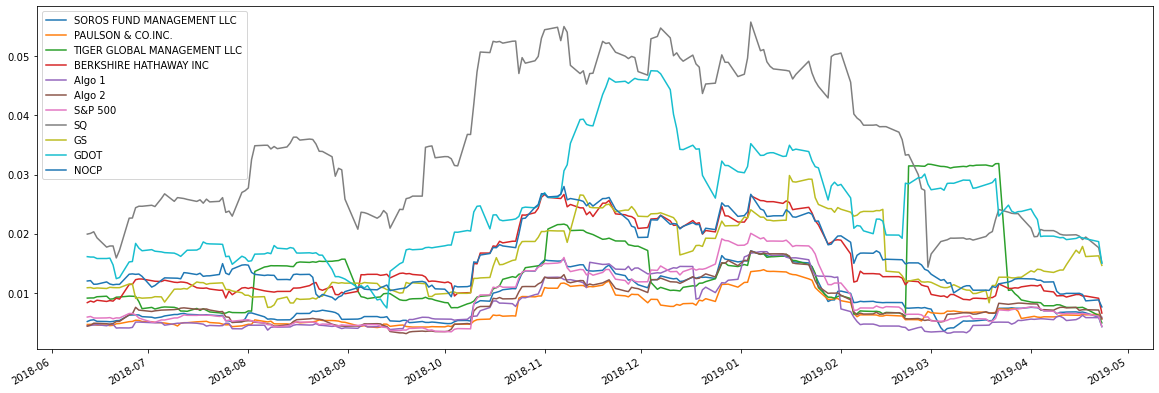

In [72]:
# Calculate and plot rolling standard deviation
combined_returns.rolling(window=21).std().plot(figsize=(20,7))

### Calculate and plot the correlation

<AxesSubplot:>

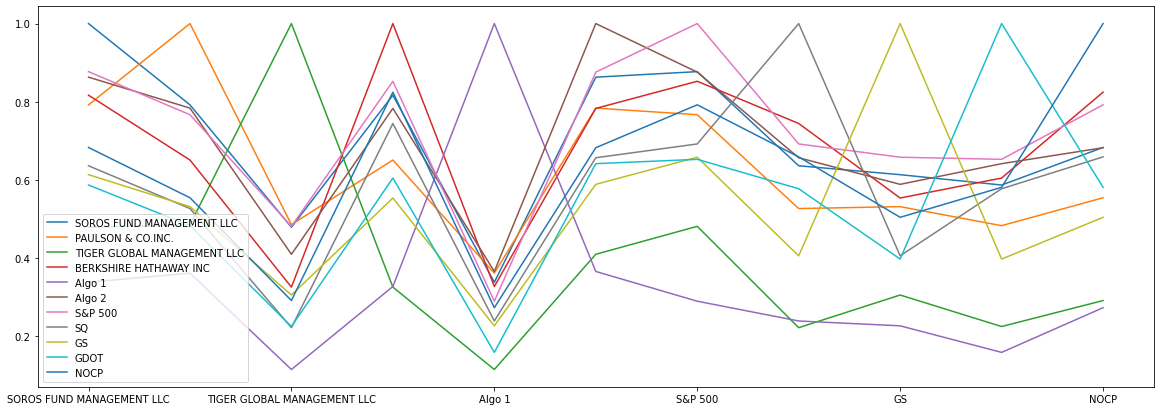

In [73]:
# Calculate and plot the correlation
returns_corr = combined_returns.corr()
# returns_corr.plot(figsize=(20,7))
returns_corr.plot(figsize=(20,7))

In [74]:
# Display de correlation matrix
returns_corr.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,SQ,GS,GDOT,NOCP
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.636015,0.613233,0.586755,0.682919
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.526507,0.531437,0.482716,0.554123
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.221577,0.305232,0.224544,0.291055
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.744264,0.553493,0.604630,0.824391
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.238744,0.226354,0.158357,0.272740
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.656574,0.588495,0.641402,0.682227
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.691888,0.657912,0.652517,0.792070
SQ,0.636015,0.526507,0.221577,0.744264,0.238744,0.656574,0.691888,1.000000,0.405508,0.577272,0.658758
GS,0.613233,0.531437,0.305232,0.553493,0.226354,0.588495,0.657912,0.405508,1.000000,0.397238,0.504075
GDOT,0.586755,0.482716,0.224544,0.604630,0.158357,0.641402,0.652517,0.577272,0.397238,1.000000,0.580883


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [75]:
my_portfolio = ['SQ','GS','GDOT','NOCP']

In [76]:
my_portfolio = ['SQ','GS','GDOT','NOCP']
sp500 = combined_returns['S&P 500']
var = combined_returns['S&P 500'].var()
days=60

# i=0
def plot_beta(my_portfolio,sp500,var,days,i):
    cov = combined_returns[my_portfolio[i]].rolling(days).cov(sp500)
    beta = cov / var
    
    beta.plot(figsize=(20,7),cmap='summer',title="Beta for " + str(my_portfolio[i]))

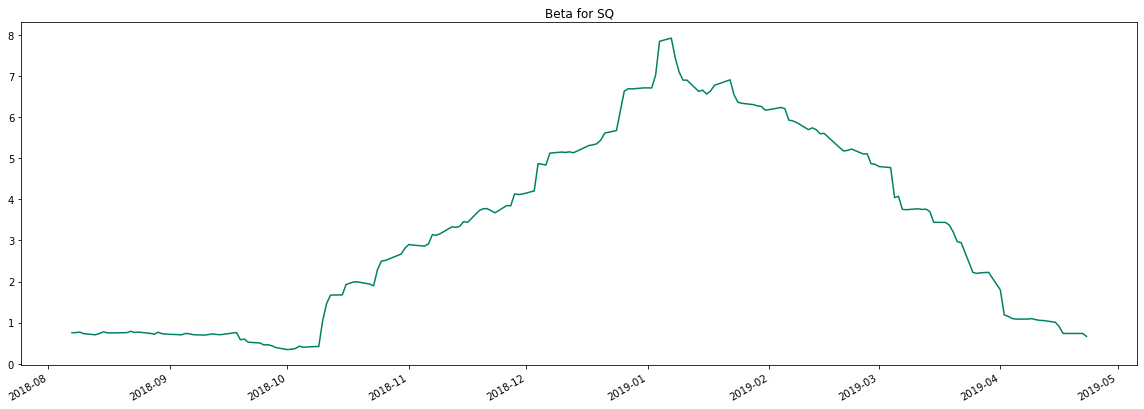

In [77]:
i = 0 # my_portfolio[i]='SQ'
plot_beta(my_portfolio,sp500,var,days,i)

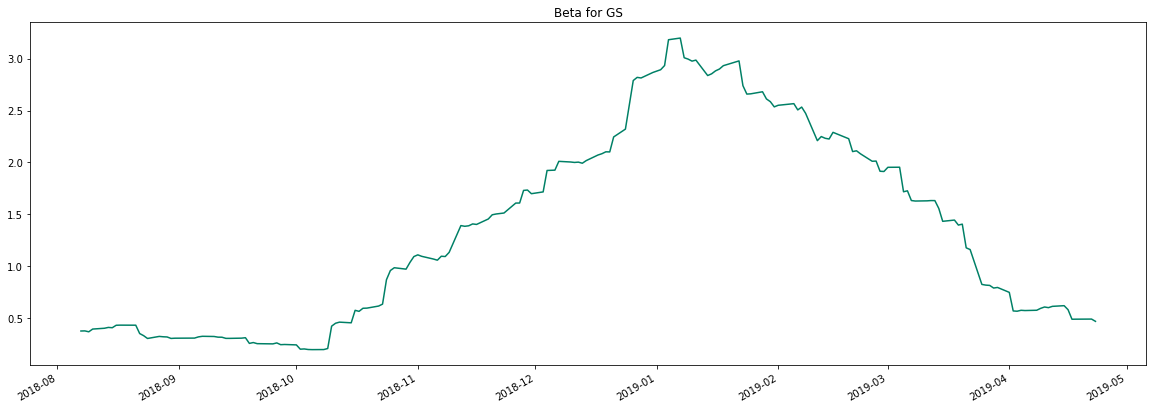

In [78]:
i += 1 # my_portfolio[i]='GS'
plot_beta(my_portfolio,sp500,var,days,i)

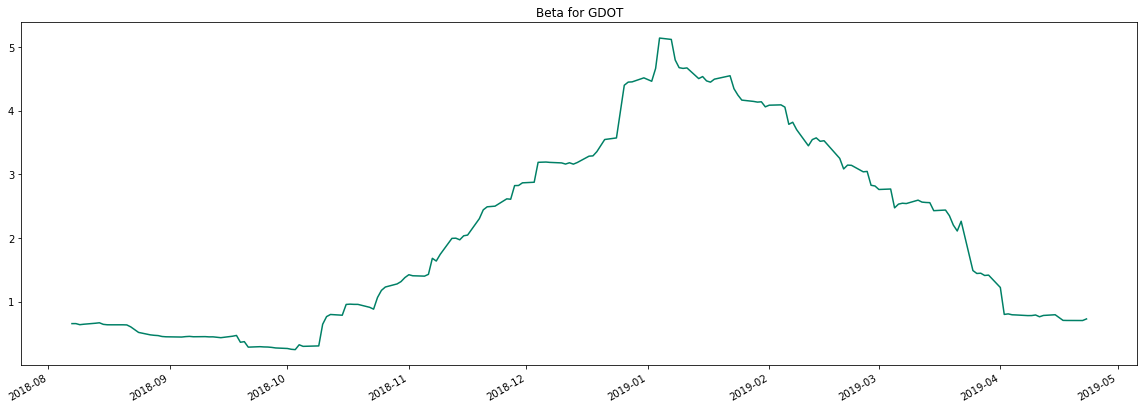

In [79]:
i += 1 # my_portfolio[i]='NOCP'
plot_beta(my_portfolio,sp500,var,days,i)

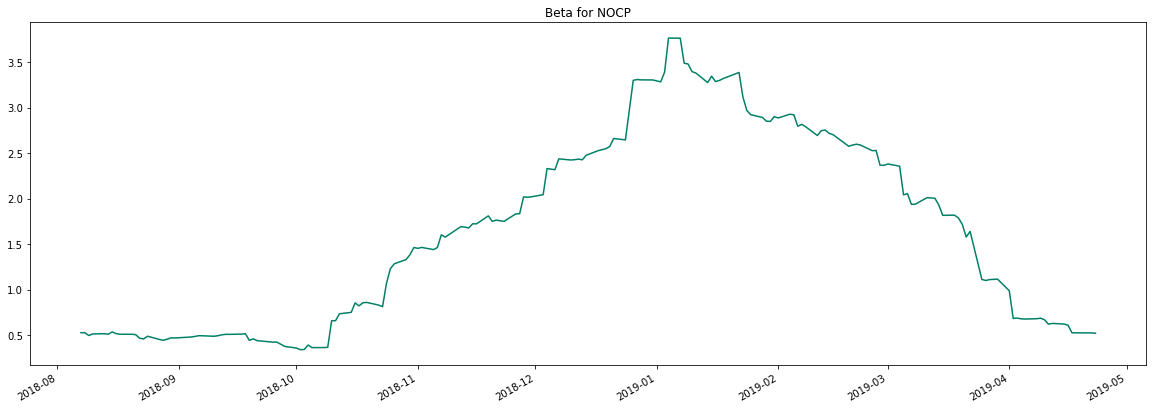

In [80]:
i += 1 # my_portfolio[i]='GDOT'
plot_beta(my_portfolio,sp500,var,days,i)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [81]:
# Calculate Annualized Sharpe Ratios
annualized_std = combined_returns.std() * np.sqrt(252)
annualized_sharpe_ratio = (combined_returns.mean() * 252) / annualized_std

<AxesSubplot:>

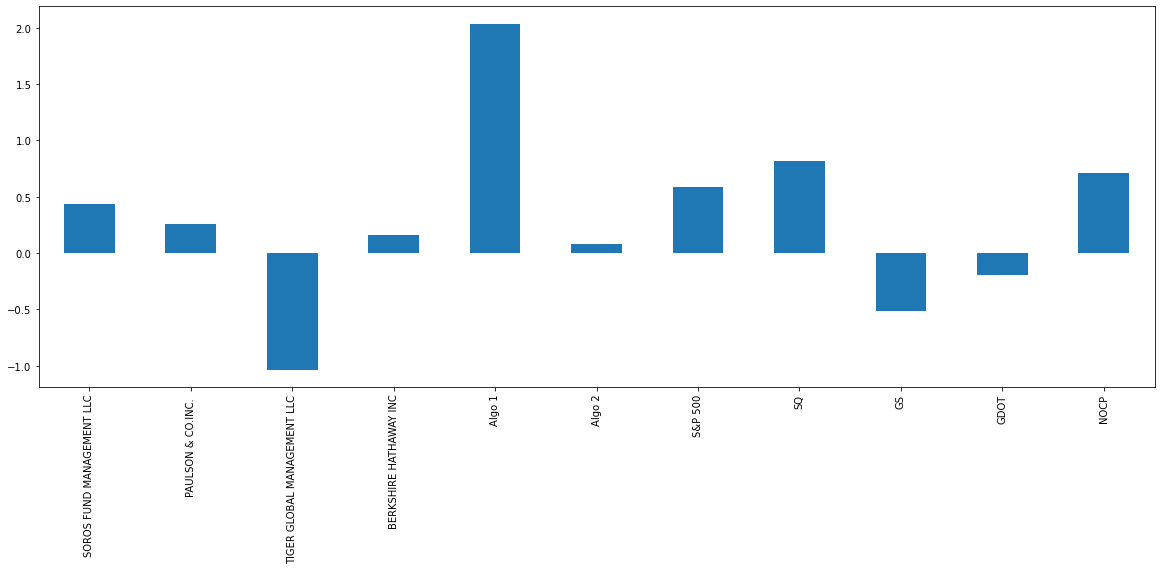

In [82]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind='bar',figsize=(20,7))

### *How does your portfolio do?*

### My Portfolio Rankings<sup>*</sup>

<p>  
    <ul>
        <li>SQ: 2nd</li>
        <li>NOCP: 3rd</li>
        <li>GDOT: 9th</li>
        <li>GS: 10th</li>
    </ul>
</p>

<h6><sup>*</sup>11 total in descending order (S&P 500 4th)</h6>

*(Visual below)*

In [83]:
annualized_sharpe_ratio.sort_values(inplace=True)
annualized_sharpe_ratio

TIGER GLOBAL MANAGEMENT LLC   -1.034216
GS                            -0.519287
GDOT                          -0.195906
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
PAULSON & CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
S&P 500                        0.584820
NOCP                           0.714034
SQ                             0.812357
Algo 1                         2.035665
dtype: float64

<AxesSubplot:>

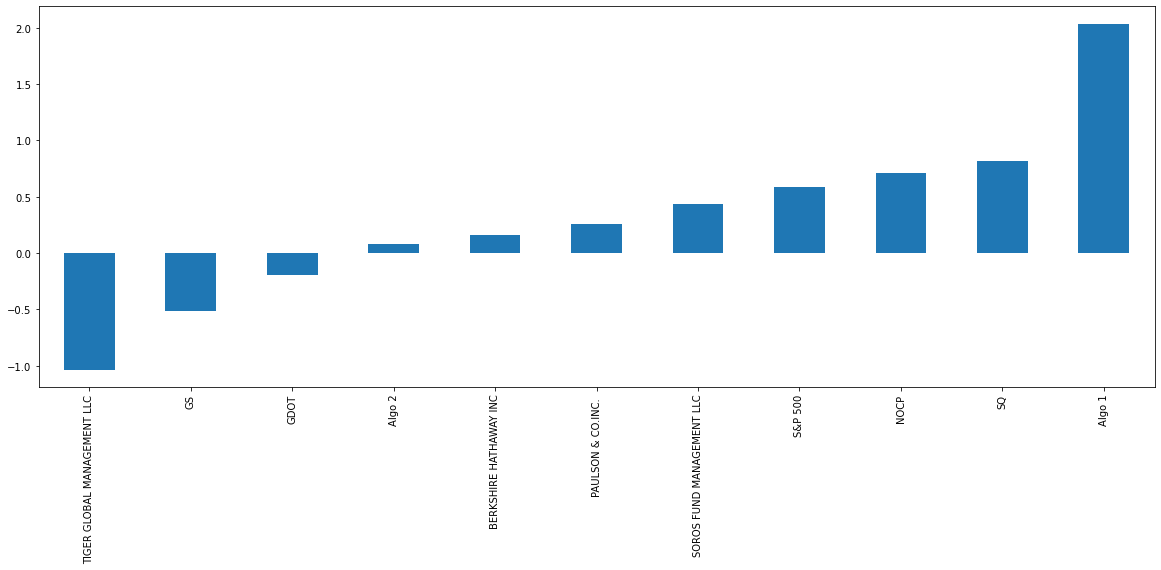

In [84]:
annualized_sharpe_ratio.plot(kind='bar',figsize=(20,7))